<a href="https://colab.research.google.com/github/Gabor-Depo/Portfolio-Assets-Allocation-and-Statistical-Data-Analysis/blob/main/Portfolio_Assets_Allocation_and_Statistical_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assets Allocation and Statistical Data Analysis**

### 1. PROJECT OVERVIEW AND ASSET TYPES

PROJECT INTRODUCTION

This project is creating a function to perform portfolio analysis such as calculating portfolio returns, risk and Sharpe ratio.
A portfolio is a collection of financial investments such as stocks, fixed income securities (bonds), cash, mutual funds and Exchange Traded Funds (ETFs).

Let's assume that you have $1M dollars to invest in the market, how can you allocate these assets among a selected set of securities? Should you invest them all in Apple? S&P500? Bonds? The answer depends on many factors such as client's risk tolerance, target returns and investment time span.

TYPES OF ASSETS: 1. EQUITIES (STOCKS):

A stock simply represents an ownership of a certain percentage of a company.
A stock gives the owner the right to some shares in a given company depending on how much stock (shares) they own. Individuals can buy them via online brokerage firms.
Stocks are generally liquid as compared to real estate which could take a much longer time to sell.

TYPES OF ASSETS: 2. FIXED INCOME SECURITIES (BONDS)

A bond is a fixed income that are generally issued by governments or corporations and represents a loan made by an investor to the borrower.
Bonds pay the investor a fixed stated interest rate.
Bonds are used by companies and Governments to raise money to fund future projects.
Bonds that are less risky pay less interest compared to high risk bonds.
Bond coupons represent a semi-annual interest payments to the bond holder.

TYPES OF ASSETS: 3. EXCHANGE TRADED FUNDS (ETFs)

ETFs are a type of security that includes a group of securities and possibly track an index.
ETFs are like mutual funds however they are marketable
securities and are being traded on exchanges similar to any other stock.
ETFs can include a collection of stocks, bonds, and commodities. ETFs have generally low management fees and offer a tool for risk diversification.



### 2. IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# Read the stock data file
stocks_df = pd.read_csv('/content/drive/MyDrive/Python & Machine Learning for Financial Analysis/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')


### 3. UNERSTAND THE CONCEPT OF ASSET ALLOCATION

ASSET ALLOCATION

- Asset allocation is an investment strategy that is used to allocate client's assets based on their risk tolerance, target returns and
investment time span.
- The goal of portfolio managers is to maximize returns and
reduce risks.
- There are many asset classes such as:
 - Equities (stocks)
 - Fixed income securities (Bonds)
 - Cash and equivalents
 - Exchange Traded Funds
 - Real estate
 - Commodities


### 4. PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [ ]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1

# Set random seed
# np.random.seed(101)
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights)
print(weights)



[0.15844379 0.15491694 0.10514747 0.04157719 0.00203106 0.12835396
 0.15632513 0.0915249  0.16167956]


In [ ]:
# Normalize the stock avalues
df_portfolio = normalize(stocks_df)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [ ]:
df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [ ]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.584438e+05,154916.936750,105147.468474,41577.191609,2031.062670,128353.961873,1.563251e+05,91524.903547,161679.558097
1,2012-01-13,1.578497e+05,153049.965112,104972.917398,42331.270929,2059.809082,127365.804156,1.261115e+05,90848.977176,160879.580124
2,2012-01-17,1.596884e+05,154362.994339,105601.288703,41988.507602,2097.214047,127962.961801,1.471946e+05,91370.822922,161451.177953
3,2012-01-18,1.613465e+05,153993.704869,105880.564838,43633.771573,2187.031953,128723.635495,1.483567e+05,92000.236359,163244.566175
4,2012-01-19,1.608352e+05,155019.508952,106194.750491,43873.705902,2244.870947,128332.635423,1.480800e+05,92968.338861,164050.775082
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.158746e+06,357554.269194,104204.908026,57310.024907,37001.177206,89183.073189,8.217556e+06,430015.714527,415308.673318
2155,2020-08-06,1.199174e+06,353286.920104,104169.998509,63274.106803,37231.724948,89659.384035,8.242789e+06,437745.787290,417978.150961
2156,2020-08-07,1.169801e+06,348814.428663,104798.369814,65227.864624,36567.441257,88834.730993,8.038764e+06,436108.731242,418242.743458
2157,2020-08-10,1.186804e+06,368079.029346,105426.744609,74208.260374,36344.627577,90363.178903,7.849845e+06,436578.542988,419389.656434


In [ ]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio

<ipython-input-24-2e9f3a333de8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $
0,2012-01-12,1.584438e+05,154916.936750,105147.468474,41577.191609,2031.062670,128353.961873,1.563251e+05,91524.903547,161679.558097,1.000000e+06
1,2012-01-13,1.578497e+05,153049.965112,104972.917398,42331.270929,2059.809082,127365.804156,1.261115e+05,90848.977176,160879.580124,9.654695e+05
2,2012-01-17,1.596884e+05,154362.994339,105601.288703,41988.507602,2097.214047,127962.961801,1.471946e+05,91370.822922,161451.177953,9.917180e+05
3,2012-01-18,1.613465e+05,153993.704869,105880.564838,43633.771573,2187.031953,128723.635495,1.483567e+05,92000.236359,163244.566175,9.993667e+05
4,2012-01-19,1.608352e+05,155019.508952,106194.750491,43873.705902,2244.870947,128332.635423,1.480800e+05,92968.338861,164050.775082,1.001600e+06
...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.158746e+06,357554.269194,104204.908026,57310.024907,37001.177206,89183.073189,8.217556e+06,430015.714527,415308.673318,1.086688e+07
2155,2020-08-06,1.199174e+06,353286.920104,104169.998509,63274.106803,37231.724948,89659.384035,8.242789e+06,437745.787290,417978.150961,1.094531e+07
2156,2020-08-07,1.169801e+06,348814.428663,104798.369814,65227.864624,36567.441257,88834.730993,8.038764e+06,436108.731242,418242.743458,1.070716e+07
2157,2020-08-10,1.186804e+06,368079.029346,105426.744609,74208.260374,36344.627577,90363.178903,7.849845e+06,436578.542988,419389.656434,1.056704e+07


In [ ]:
# Let's calculate the portfolio daily return
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.584438e+05,154916.936750,105147.468474,41577.191609,2031.062670,128353.961873,1.563251e+05,91524.903547,161679.558097,1.000000e+06,0.000000
1,2012-01-13,1.578497e+05,153049.965112,104972.917398,42331.270929,2059.809082,127365.804156,1.261115e+05,90848.977176,160879.580124,9.654695e+05,-3.453047
2,2012-01-17,1.596884e+05,154362.994339,105601.288703,41988.507602,2097.214047,127962.961801,1.471946e+05,91370.822922,161451.177953,9.917180e+05,2.718722
3,2012-01-18,1.613465e+05,153993.704869,105880.564838,43633.771573,2187.031953,128723.635495,1.483567e+05,92000.236359,163244.566175,9.993667e+05,0.771265
4,2012-01-19,1.608352e+05,155019.508952,106194.750491,43873.705902,2244.870947,128332.635423,1.480800e+05,92968.338861,164050.775082,1.001600e+06,0.223445
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.158746e+06,357554.269194,104204.908026,57310.024907,37001.177206,89183.073189,8.217556e+06,430015.714527,415308.673318,1.086688e+07,0.158776
2155,2020-08-06,1.199174e+06,353286.920104,104169.998509,63274.106803,37231.724948,89659.384035,8.242789e+06,437745.787290,417978.150961,1.094531e+07,0.721725
2156,2020-08-07,1.169801e+06,348814.428663,104798.369814,65227.864624,36567.441257,88834.730993,8.038764e+06,436108.731242,418242.743458,1.070716e+07,-2.175818
2157,2020-08-10,1.186804e+06,368079.029346,105426.744609,74208.260374,36344.627577,90363.178903,7.849845e+06,436578.542988,419389.656434,1.056704e+07,-1.308655



### 5. PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [ ]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio
# (3) Daily return

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()

  # Normalize the stock avalues
  df_portfolio = normalize(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)

  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):

    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio


### 6. PERORM PORTFOLIO DATA VISUALIZATION

In [ ]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

NameError: name 'px' is not defined

In [ ]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

In [ ]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

**MINI CHALLENGE #5:**
- **Plot the portfolio overall daily worth vs. time.**
- **Rerun the code with various weights and visualize the final value.**

In [ ]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show()


### 7. UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

DAILY AND CUMMULATIVE RETURNS

Stock daily return is a calculation of how much investors have gained or lost per day.

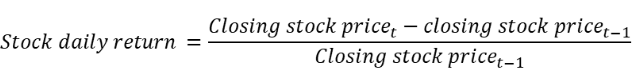

Cumulative return is a measure of the aggregate amount that the stock gained or lost over a period of time.

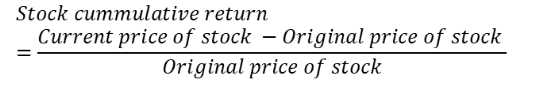


STANDARD DEVIATION (RISK/VOLATILITY)

The standard deviation is a measurement of the dispersion away from the mean.
The more spread the data is, the higher the standard deviation. Volatile stocks have high standard deviation and therefore standard deviation represent the risk associated with the security.


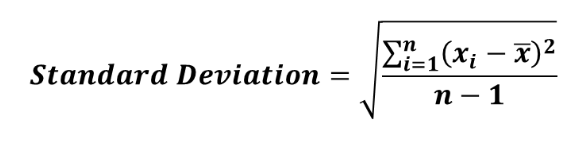

where:
- X1 = Value of data with the index i
- x = mean value
- n = total number of data points in the data set

SHARPE RATIO

- Sharpe ratio is used by investors to calculate the return of an investment compared to its risk.

- Sharpe ratio is calculated as follows:

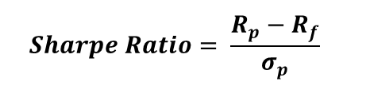

- Sharpe ratio is simply a calculation of the average return earned in excess of the risk free rate per unit of risk (volatility).

- Note that R, is the risk-free rate of return which is the return on an investment with zero risk, meaning it's the return investors could expect for taking no risk.

- As Sharpe ratio increases, risk-adjusted return increases and security becomes more desired by investors.


### 8. CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [ ]:
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.584438e+05,154916.936750,105147.468474,41577.191609,2031.062670,128353.961873,1.563251e+05,91524.903547,161679.558097,1.000000e+06,0.000000
1,2012-01-13,1.578497e+05,153049.965112,104972.917398,42331.270929,2059.809082,127365.804156,1.261115e+05,90848.977176,160879.580124,9.654695e+05,-3.453047
2,2012-01-17,1.596884e+05,154362.994339,105601.288703,41988.507602,2097.214047,127962.961801,1.471946e+05,91370.822922,161451.177953,9.917180e+05,2.718722
3,2012-01-18,1.613465e+05,153993.704869,105880.564838,43633.771573,2187.031953,128723.635495,1.483567e+05,92000.236359,163244.566175,9.993667e+05,0.771265
4,2012-01-19,1.608352e+05,155019.508952,106194.750491,43873.705902,2244.870947,128332.635423,1.480800e+05,92968.338861,164050.775082,1.001600e+06,0.223445
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.158746e+06,357554.269194,104204.908026,57310.024907,37001.177206,89183.073189,8.217556e+06,430015.714527,415308.673318,1.086688e+07,0.158776
2155,2020-08-06,1.199174e+06,353286.920104,104169.998509,63274.106803,37231.724948,89659.384035,8.242789e+06,437745.787290,417978.150961,1.094531e+07,0.721725
2156,2020-08-07,1.169801e+06,348814.428663,104798.369814,65227.864624,36567.441257,88834.730993,8.038764e+06,436108.731242,418242.743458,1.070716e+07,-2.175818
2157,2020-08-10,1.186804e+06,368079.029346,105426.744609,74208.260374,36344.627577,90363.178903,7.849845e+06,436578.542988,419389.656434,1.056704e+07,-1.308655


In [ ]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 927.9249257458966 %


In [ ]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.9084458957460277


In [ ]:
# Calculate the average daily return
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.1262295538466158 %


In [ ]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.049981060492877
